In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Dataset
df = pd.read_csv(r'C:\Users\sanjy\Downloads\Employee_Attrition_Prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Encoding Categorical Values
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'EducationField']
encoder = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(encoder.fit_transform)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Define Features and Target
y = df['Attrition']
X = df.drop(['EmployeeCount', 'Attrition', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [8]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X, y = rus.fit_resample(X, y)

In [9]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
print("After Undersampling:")
print(y.value_counts())

After Undersampling:
Attrition
0    237
1    237
Name: count, dtype: int64


In [11]:
# Standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)
X_standardized = standard_scaler.fit_transform(X)

In [12]:
# Normalization
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)
X_normalized = min_max_scaler.fit_transform(X)

In [13]:
# Grid Search CV for Hyperparameter Tuning
def tune_hyperparameters(model, X, y):
    param_grid = {
        "C": np.logspace(-3, 3, 7),
        "penalty": ["l1", "l2"],
        "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
    grid_search = GridSearchCV(model, param_grid=param_grid)
    grid_search.fit(X, y)
    print("Best Parameters:", grid_search.best_params_)

In [14]:
print("### Grid Search with Standardized Data ###")
tune_hyperparameters(LogisticRegression(max_iter=100000), X_train_standardized, y_train)

### Grid Search with Standardized Data ###
Best Parameters: {'C': np.float64(0.1), 'penalty': 'l2', 'solver': 'liblinear'}


In [15]:
print("### Grid Search with Normalized Data ###")
tune_hyperparameters(LogisticRegression(max_iter=100000), X_train_normalized, y_train)

### Grid Search with Normalized Data ###
Best Parameters: {'C': np.float64(0.1), 'penalty': 'l2', 'solver': 'liblinear'}


In [16]:
# Training, Evaluation & ROC Plot
def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()


### Without Scaling ###

Accuracy:  0.7062937062937062
Precision:  0.7323943661971831
Recall:  0.6933333333333334
F1 Score:  0.7123287671232876
Confusion Matrix:
 [[49 19]
 [23 52]]


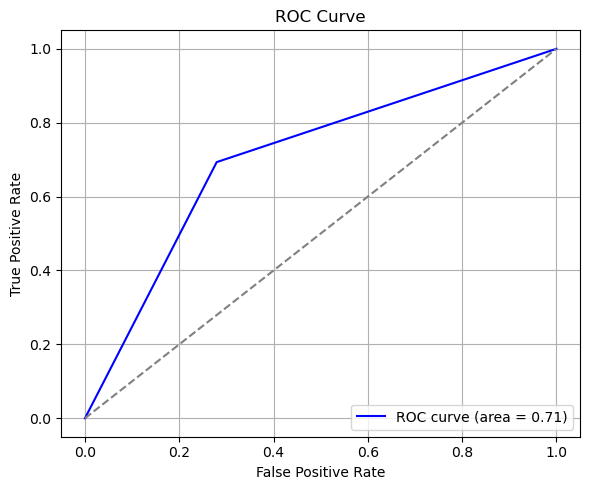

In [17]:
print("\n### Without Scaling ###\n")
train_predict_evaluate(LogisticRegression(max_iter=100000), X_train, y_train, X_test, y_test)


### With Standardization ###

Accuracy:  0.6643356643356644
Precision:  0.6626506024096386
Recall:  0.7333333333333333
F1 Score:  0.6962025316455697
Confusion Matrix:
 [[40 28]
 [20 55]]


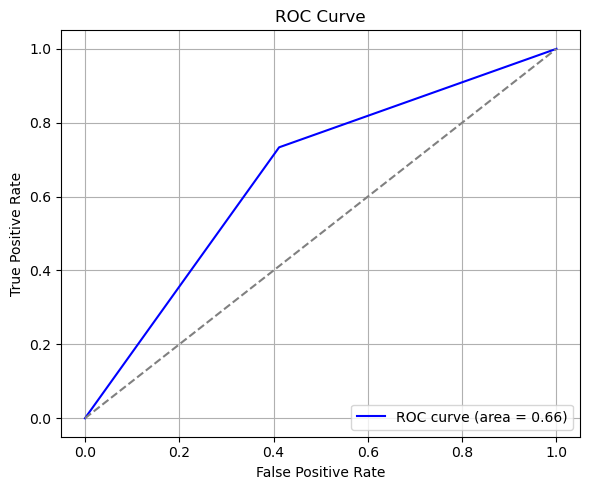

In [18]:
print("\n### With Standardization ###\n")
train_predict_evaluate(
    LogisticRegression(max_iter=100000, C=0.001, penalty='l2', solver='liblinear'),
    X_train_standardized, y_train, X_test_standardized, y_test
)


### With Normalization ###

Accuracy:  0.6783216783216783
Precision:  0.7101449275362319
Recall:  0.6533333333333333
F1 Score:  0.6805555555555556
Confusion Matrix:
 [[48 20]
 [26 49]]


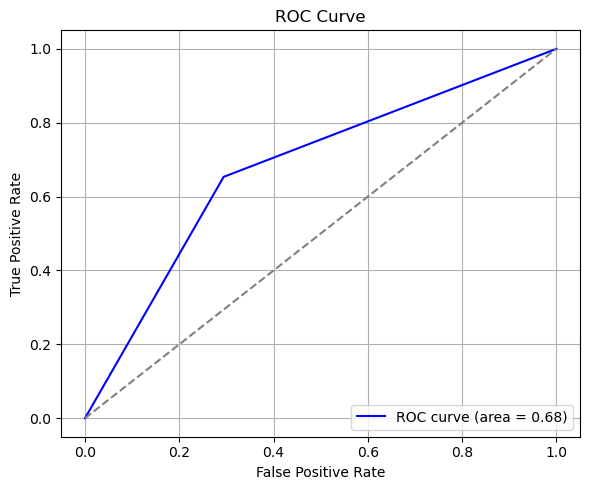

In [19]:
print("\n### With Normalization ###\n")
train_predict_evaluate(
    LogisticRegression(max_iter=100000, C=100, penalty='l1', solver='liblinear'),
    X_train_normalized, y_train, X_test_normalized, y_test
)

In [20]:
# K-Fold Cross Validation
def cross_validation(model, X, y):
    scores = cross_validate(model, X, y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))
    metrics = {
        "Accuracy": np.mean(scores['test_accuracy']),
        "Precision": np.mean(scores['test_precision']),
        "Recall": np.mean(scores['test_recall']),
        "F1 Score": np.mean(scores['test_f1'])
    }

    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    return list(metrics.values())

metrics = []

In [21]:
print("\n### Without Scaling ###\n")
metrics.append(cross_validation(LogisticRegression(max_iter=100000), X, y))


### Without Scaling ###

Accuracy: 0.7257
Precision: 0.7291
Recall: 0.7389
F1 Score: 0.7296


In [22]:
print("\n### With Standardization ###\n")
metrics.append(cross_validation(LogisticRegression(max_iter=100000, C=0.1, penalty='l2', solver='liblinear'), X_standardized, y))


### With Standardization ###

Accuracy: 0.7362
Precision: 0.7307
Recall: 0.7599
F1 Score: 0.7423


In [23]:
print("\n### With Normalization ###\n")
metrics.append(cross_validation(LogisticRegression(max_iter=100000, C=100, penalty='l1', solver='liblinear'), X_normalized, y))


### With Normalization ###

Accuracy: 0.7215
Precision: 0.7187
Recall: 0.7472
F1 Score: 0.7292


In [24]:
# Compare Performances
mdf = pd.DataFrame(metrics, columns=["Accuracy", "Precision", "Recall", "F1 Score"],
                   index=["Without Scaling", "With Standardization", "With Normalization"])

mdf

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.725711,0.729140,0.738918,0.729645
With Standardization,0.736215,0.730670,0.759929,0.742256
With Normalization,0.721478,0.718654,0.747163,0.729170


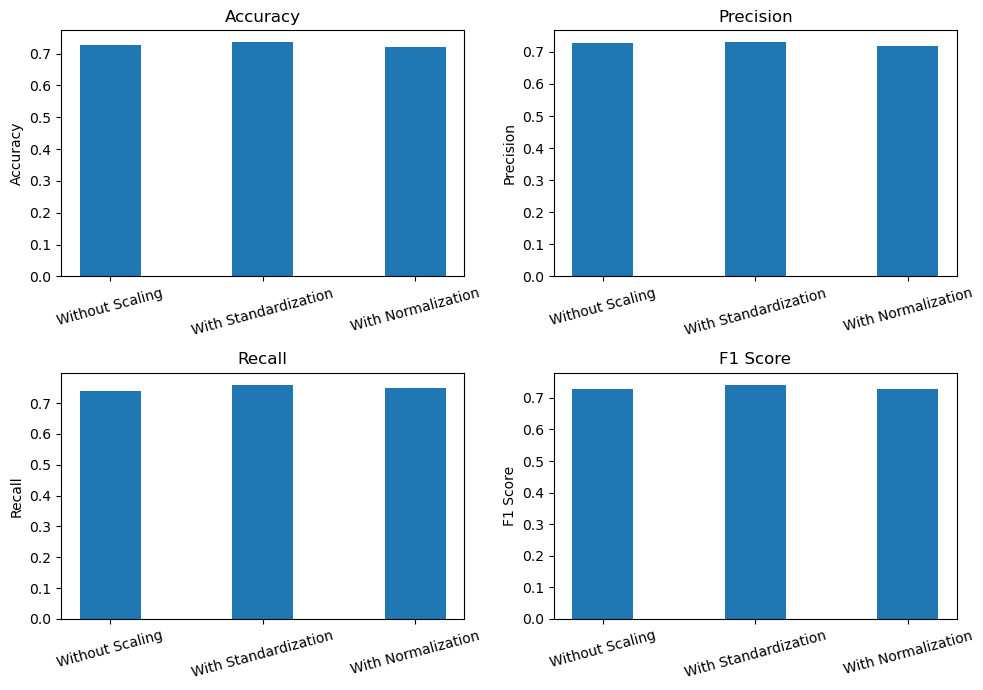

In [25]:
# Plot each metric
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bar_width = 0.4

for ax, col in zip(axs.ravel(), mdf.columns):
    ax.bar(mdf.index, mdf[col], width=bar_width)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xticks(range(len(mdf.index)))
    ax.set_xticklabels(mdf.index, rotation=15)
    ax.grid(False)

plt.tight_layout()
plt.show()

In [26]:
# Save final performance

import sys
sys.path.append(r"C:\Users\sanjy\Downloads\Employee_Attrition_Prediction")
from utils import save_performance

final_lr = LogisticRegression(max_iter=100000, C=0.1, penalty='l1', solver='liblinear')
scores = cross_validate(final_lr, X_standardized, y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

performance_dict = {
    "accuracy": np.mean(scores['test_accuracy']),
    "precision": np.mean(scores['test_precision']),
    "recall": np.mean(scores['test_recall']),
    "f1": np.mean(scores['test_f1'])
}

save_performance("LR_undersampled", performance_dict)

Saved performance for LR_undersampled
